# JUPYTER NOTEBOOK S5

Scripts ejecutats amb 1024 clusters amb descriptor SIFT:

In [5]:
import numpy as np
import time
from params import get_params

params = get_params()
print "Number of clusters:", params['descriptor_size']
print "Descriptor type:",params['descriptor_type']

Number of clusters: 1024
Descriptor type: SIFT


### FEATURE EXTRACTION

In [6]:
import get_features as GF
params['split'] = 'train'
t = time.time()
X, pca, scaler = GF.stack_features(params)
print "Done. Time elapsed:", time.time() - t
print np.shape(X)

Done. Time elapsed: 39.5384430885
(219208, 128)


In [7]:
t = time.time()
GF.train_codebook(params,X)

print "Done. Time elapsed:", time.time() - t

Done. Time elapsed: 58.9149899483


In [8]:
t = time.time()
GF.get_features(params)

print "Done. Time elapsed for training set:", time.time() - t

# Switch to validation set
params['split'] = 'val'
t = time.time()
# Run again
GF.get_features(params)

print "Done. Time elapsed for validation set:", time.time() - t



Done. Time elapsed for training set: 42.760518074
Done. Time elapsed for validation set: 40.72488904


### GENERACIÓ DEL RANKING

In [9]:
from rank import *
t = time.time()
rank(params)

print "Done. Time elapsed:", time.time() - t

Done. Time elapsed: 3.6421020031


### EVALUACIÓ DEL RANKING

In [11]:
import eval_rankings as ER
ap_list, dict_ = ER.eval_rankings(params)
print "Number of queries:", len(ap_list)
print "Mean Average Precision", np.mean(ap_list)

Number of queries: 288
Mean Average Precision 0.227425102501


###### obtenim una mean average precision de 0.227425102501

In [16]:
for id in dict_.keys():
    
    if not id == 'desconegut':
        # We divide by 10 because it's the number of images per class in the validation set.
        print id, dict_[id]/23

mercat_independencia 0.193403735328
societat_general 0.154343896103
farmacia_albinyana 0.5969326697
ajuntament 0.557852271873
mnactec 0.172434454782
escola_enginyeria 0.150315273767
masia_freixa 0.0991511255191
castell_cartoixa 0.192001415304
dona_treballadora 0.116070619765
catedral 0.164556545607
teatre_principal 0.327241362506
estacio_nord 0.123454434982


###### es mostren les diferents average precision de cada clase (poden no ser exactes degut a que el nombre d'imatges a cada classe es diferent en el nostre cas)

teatre_principal
458
Displaying...


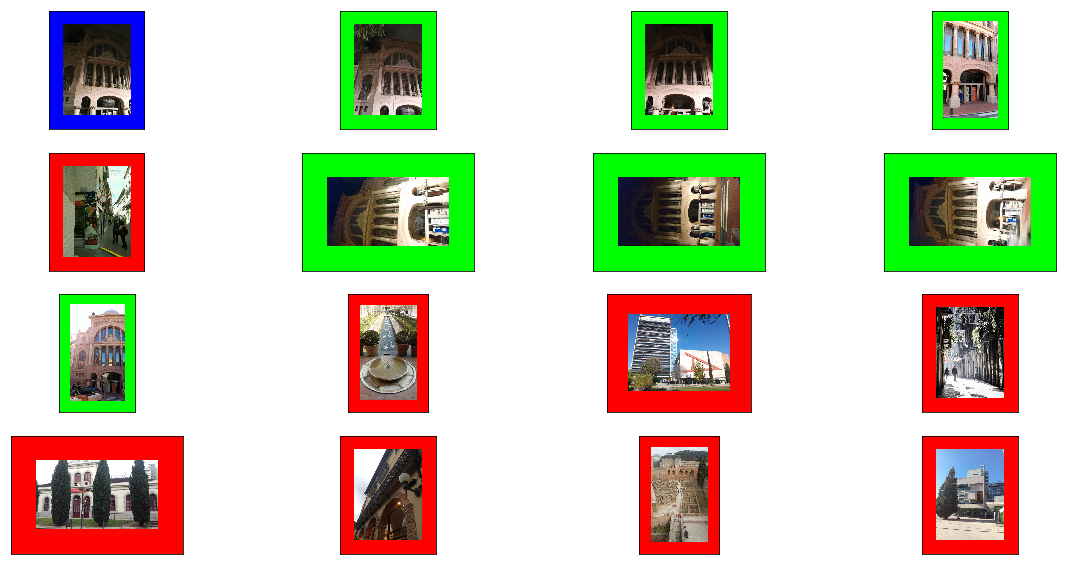

In [17]:
query_id = 'cexrweisrn.jpg'
ER.single_eval(params,query_id)

ajuntament
458
Displaying...


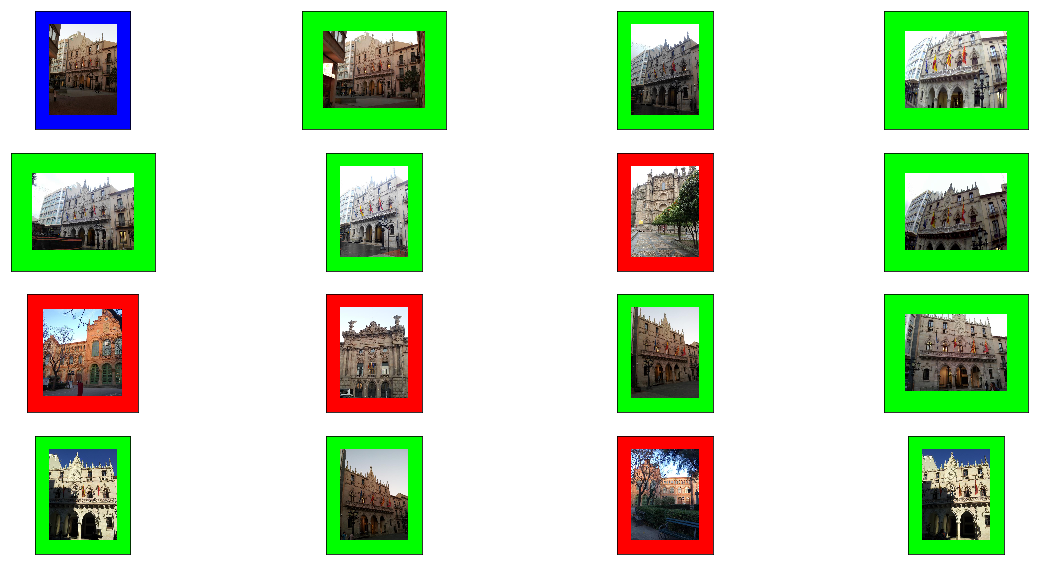

In [18]:
query_id = 'qhlpqfsycp.jpg'
ER.single_eval(params,query_id)

###### El Ranking de totes dues imatges agafades es mostra satisfactori, trobant bastantes imatges correctament, encara que sorprent alguna imatge erronia al principi de la llista